# 차원축소

* CNN도 차원축소를 하는 방법 중 하나
* 차원을 줄임으로써 PCA,SVD가 있음
* 군집화라는 것도 있음.
* 데이터 전처리에서 나오는데 지금 하는 차원축소는 비지도 학습중에 대표적인 알고리즘을 이용하는 것.

### 차원의 저주

* 차원이 커질수록 데이터 포인트들간 거리가 크게 늘어남
* 데이터가 희소화됨
* 막 축소하면 편중될 수 있음 
* 그 축을 찾아야함
----------------------------
* 수백~수천개 이상의피처로 구성된 포인트들간 거리에 기반한 ML알고리즘이 무력화됨.
* 또한 피처가 많을 경우 개별피처간에 상관관계가 높아 선형 회귀와 같은 모델에서 다중 공선성 문제로 모델의 예측 성능이 저하될 가능성이 높음

### 피처 추출

* 차원을 축소하면서 나온 벡터들은 새로운 추출된 피처들임
* 그 피처들은 주요 성분이 됨.
* 그 숨은의미를 찾을 수 있음
(추천엔진,이미지 분류 및 변환, 문서 토픽 모델링)

##### PCA의 원리를 설명하는 공분산 


In [3]:
# Eating, exercise habbit and their body shape
import pandas as pd
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

In [4]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [5]:
df.head(3)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat


In [7]:
y=df['body_shape']
X=df.drop('body_shape',axis=1)

In [8]:
y
X

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


In [9]:
from sklearn.preprocessing import StandardScaler #standard도 되고 minmax도 되고
X_std=StandardScaler().fit_transform(X)

In [10]:
X_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

##### Covariance Matrix of Features
* 고유벡터,고유값 찾은 다음에 공분산 행렬

In [14]:
import numpy as np

features=X_std.T
covariance_matrix=np.cov(features)
covariance_matrix 

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

In [16]:
eig_vals, eig_vecs= np.linalg.eig(covariance_matrix) # 고유값과 고유벡터를 나눠줌.
# 고유벡터 구하는 법 , 

In [19]:
eig_vals

array([4.0657343 , 0.8387565 , 0.07629538, 0.27758568, 0.2971837 ])

In [20]:
eig_vecs #주성분 벡터도 나오는 것

array([[-0.508005  , -0.0169937 , -0.84711404,  0.11637853,  0.10244985],
       [-0.44660335, -0.36890361,  0.12808055, -0.63112016, -0.49973822],
       [-0.38377913,  0.70804084,  0.20681005, -0.40305226,  0.38232213],
       [-0.42845209, -0.53194699,  0.3694462 ,  0.22228235,  0.58954327],
       [ 0.46002038, -0.2816592 , -0.29450345, -0.61341895,  0.49601841]])

In [21]:
eig_vals[0]

array([-0.508005  , -0.0169937 , -0.84711404,  0.11637853,  0.10244985])

In [22]:
sum(eig_vals)

5.555555555555556

In [25]:
eig_vals[0]/sum(eig_vals) #칼로리의 영향정도

0.7318321731427544

#### 선택된 고유벡터들을 사영시킨다.(행렬의 곱은 선형을 시킬 수 있음)

In [29]:
projected_X=X_std.dot(eig_vecs.T[0]) # T를 해주고나서 행렬을 바꾸고나서 사영시켜준것
projected_X

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [49]:
result=pd.DataFrame(projected_X,columns=['PC_1'])
result['y-axis']=0.0
result

,PC_1,y-axis
0,2.226009,0.0
1,0.018143,0.0
2,-1.762966,0.0
3,2.735424,0.0
4,-3.027115,0.0
5,2.147026,0.0
6,0.371425,0.0
7,-2.592399,0.0
8,0.393478,0.0
9,-0.509025,0.0


In [50]:
result['label']=y

In [51]:
result

,PC_1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA result')

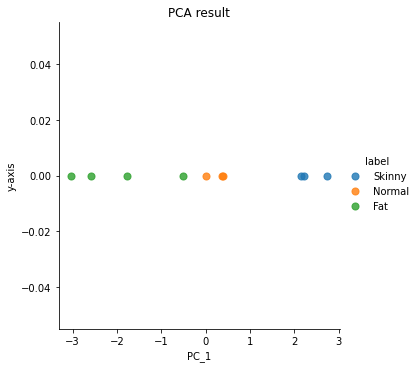

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lmplot('PC_1','y-axis',data=result,fit_reg=False,scatter_kws={'s': 50},hue='label')
plt.title('PCA result')

In [56]:
from sklearn.decomposition import PCA
pca=PCA(n_components= 1) # 이게 1이냐 2냐에 따라 차원이 바뀜 component 가 n차원이됨


In [61]:
pca_x=pca.fit_transform(X_std)
pca_x=-1*pca_x

In [63]:
result=pd.DataFrame(pca_x,columns=['PC_1'])
result['y-axis']=0.0
result['label']=y

result

,PC_1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA result')

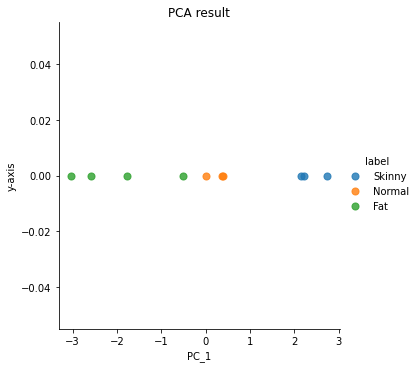

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lmplot('PC_1','y-axis',data=result,fit_reg=False,scatter_kws={'s': 50},hue='label')
plt.title('PCA result')